In [32]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import data_load_data
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
mitbih_train = data_load_data.load_dataframe("train")
mitbih_train.head(5)
mitbih_train.columns = [*mitbih_train.columns[:-1], 'Beat_category']

X = mitbih_train.drop('Beat_category', axis=1)
y = mitbih_train['Beat_category']

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 1/3, random_state=42)

In [38]:
model = Sequential()
model.add(Dense(units=10, activation='tanh', input_shape=(187,)))
model.add(Dense(units=8, activation='tanh'))
model.add(Dense(units=6, activation='tanh'))
model.add(Dense(units=5, activation='softmax'))

model.summary()

c:\Users\Zermatzor\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 10)             │         1,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 5)              │            35 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,057 (8.04 KB)

 Trainable params: 2,057 (8.04 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [41]:
history = model.fit(X_train, y_train,
         validation_split=0.2,
         epochs=8, 
         batch_size=32)

Epoch 1/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8746 - loss: 0.4668 - val_accuracy: 0.9129 - val_loss: 0.3302
Epoch 2/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9271 - loss: 0.2757 - val_accuracy: 0.9370 - val_loss: 0.2448
Epoch 3/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9422 - loss: 0.2245 - val_accuracy: 0.9441 - val_loss: 0.2169
Epoch 4/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9473 - loss: 0.2041 - val_accuracy: 0.9480 - val_loss: 0.2020
Epoch 5/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9507 - loss: 0.1912 - val_accuracy: 0.9488 - val_loss: 0.1987
Epoch 6/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9525 - loss: 0.1815 - val_accuracy: 0.9498 - val_loss: 0.1903
Epoch 7/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9543 - loss: 0.1736 - val_accuracy: 0.9530 - val_loss: 0.1792
Epoch 8/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9564 - loss: 0.1663 - val_accu

913/913 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     24212
           1       0.85      0.45      0.59       717
           2       0.90      0.75      0.82      1920
           3       0.66      0.43      0.52       230
           4       0.95      0.93      0.94      2106

    accuracy                           0.95     29185
   macro avg       0.86      0.71      0.77     29185
weighted avg       0.95      0.95      0.95     29185



<Axes: >

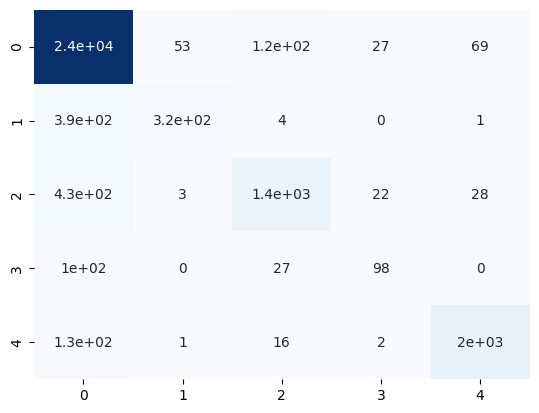

In [43]:
test_pred = model.predict(X_test)
y_test_class = y_test
y_pred_class = np.argmax(test_pred, axis=1)

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test_class, y_pred_class))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), cmap='Blues', cbar=False, annot=True)

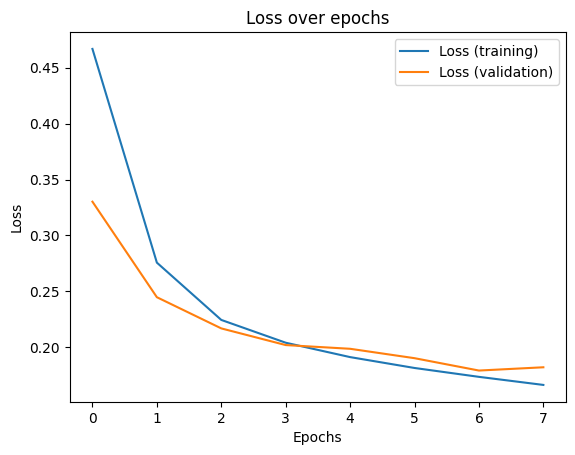

In [44]:
plt.figure()
plt.plot(history.history['loss'], label='Loss (training)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 10)             │         1,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 5)              │            35 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,057 (8.04 KB)

 Trainable params: 2,057 (8.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8420 - loss: 0.6051 - val_accuracy: 0.8833 - val_loss: 0.4399
Epoch 2/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9081 - loss: 0.3837 - val_accuracy: 0.9190 - val_loss: 0.3457
Epoch 3/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9200 - loss: 0.3349 - val_accuracy: 0.9139 - val_loss: 0.3339
Epoch 4/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9227 - loss: 0.3131 - val_accuracy: 0.9226 - val_loss: 0.3051
Epoch 5/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9247 - loss: 0.2998 - val_accuracy: 0.9248 - val_loss: 0.2928
Epoch 6/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9273 - loss: 0.2865 - val_accuracy: 0.9191 - val_loss: 0.2983
Epoch 7/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9296 - loss: 0.2752 - val_accuracy: 0.9292 - val_loss: 0.2731
Epoch 8/8
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9314 - loss: 0.2652 - val_accu

c:\Users\Zermatzor\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Zermatzor\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Zermatzor\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

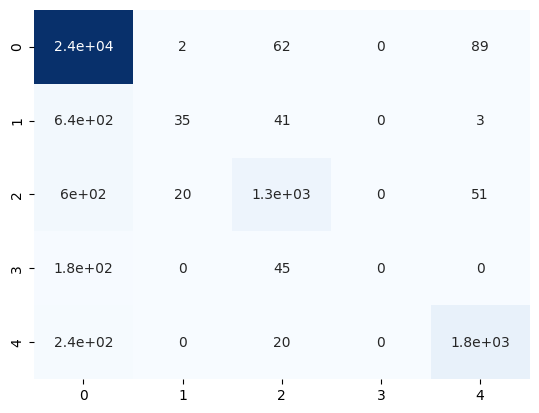

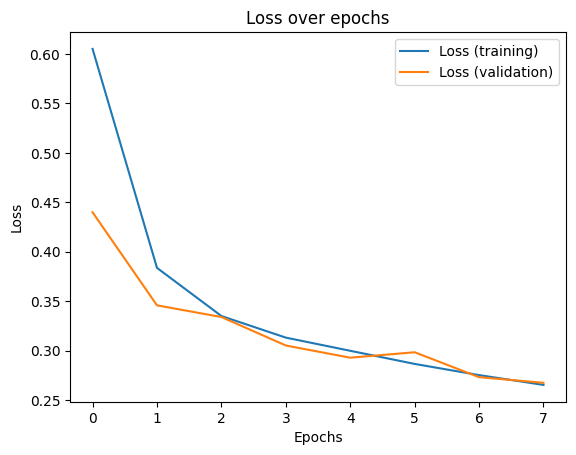

In [46]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(187,)))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

model.summary()

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

history = model.fit(X_train, y_train,
         validation_split=0.2,
         epochs=8, 
         batch_size=32)

test_pred = model.predict(X_test)
y_test_class = y_test
y_pred_class = np.argmax(test_pred, axis=1)

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test_class, y_pred_class))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), cmap='Blues', cbar=False, annot=True)

plt.figure()
plt.plot(history.history['loss'], label='Loss (training)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()